# 3.  Codificación de variables

Conjunto de datos: titanic (incluido en seaborn)

Este conjunto de datos es excelente para trabajar con variables categóricas.

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Cargar el conjunto de datos
data = sns.load_dataset('titanic')

In [3]:
# Visualizar las primeras filas
print("Conjunto de datos Titanic:")
data.head()

Conjunto de datos Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

In [5]:
# Codificar con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex'])

In [6]:
# Codificar con OneHotEncoder
onehot_encoder = pd.get_dummies(data['embarked'], prefix='embarked')

In [7]:
# Combinar con el conjunto original
data = pd.concat([data, onehot_encoder], axis=1)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre LabelEncoder y OneHotEncoder?

In [11]:
pd.concat([data, onehot_encoder], axis=1)

###LabelEncoder asigna valores númericos enteros, introduciendo un orden artificial, OneHotEncoder crea variables binarias independientes.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,sex_label,embarked_C,embarked_Q,embarked_S,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,Southampton,no,False,1,False,False,True,False,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,Cherbourg,yes,False,0,True,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,Southampton,yes,True,0,False,False,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,Southampton,yes,False,0,False,False,True,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,Southampton,no,True,1,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,Southampton,no,True,1,False,False,True,False,False,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,Southampton,yes,True,0,False,False,True,False,False,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,Southampton,no,False,0,False,False,True,False,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,Cherbourg,yes,True,1,True,False,False,True,False,False


### 2. Crea una gráfica de barras comparando las frecuencias de 'sex' antes y después de la codificación con LabelEncoder.

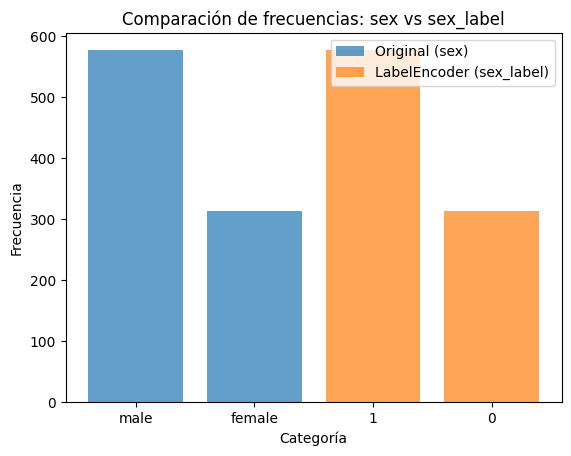

In [13]:
import matplotlib.pyplot as plt

plt.figure()

# Conteo de frecuencias de la variable original 'sex'
sex_counts = data['sex'].value_counts()

# Conteo de frecuencias de la variable codificada 'sex_label'
sex_label_counts = data['sex_label'].value_counts()

# Gráfica de barras para la variable original
plt.bar(
    sex_counts.index,
    sex_counts.values,
    alpha=0.7,
    label='Original (sex)'
)

# Gráfica de barras para la variable codificada
plt.bar(
    sex_label_counts.index.astype(str),
    sex_label_counts.values,
    alpha=0.7,
    label='LabelEncoder (sex_label)'
)

# Etiquetas
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")

# Título
plt.title("Comparación de frecuencias: sex vs sex_label")
plt.legend()
plt.show()


### 3. Utiliza OneHotEncoder para codificar la columna 'class'. ¿Qué ventajas tiene este enfoque frente a LabelEncoder?

In [17]:
# Codificar con OneHotEncoder
class_onehot = pd.get_dummies(data['class'], prefix='class')
data = pd.concat([data, class_onehot], axis=1)
#Este enfoque no introduce orden artificial, LabelEncoder asigna números, y OneHot crea columnas independientes, y es compatible con más algoritmos

### 4. Si quisieras aplicar un modelo de aprendizaje automático, ¿qué tipo de codificación elegirías para las variables categóricas? Explica tu respuesta.

In [18]:
#Usaría OneHotEncoder en la moyoriía de los casos, ya que evita introducir jerarquías artificales.